# Manuel Romero García
## Máster en Big Data y Data Science UCM
### Práctica Python Básico

## 1. Importación de librerías

In [4]:
from matplotlib import pyplot as plt
from getpass import getpass
import pandas as pd
import vlc
import pafy
import random

## 2. Creación del dataset vacío y guardado como excel

In [5]:
df = pd.DataFrame(columns=["usuarios", "modos", "niveles", "max_intentos","intentos",
                  "ganador"])

df.to_excel("juego.xlsx", index=False)

## 3. Definición de listas, carga del excel como dataset y música

In [6]:
usuarios = []
modos = []
niveles = []
max_intentos = []
intentos = []
ganador = []
f_df = pd.read_excel(r"juego.xlsx")
url_lose = "https://www.youtube.com/watch?v=yk7AiPte58Y&ab_channel=Soundbunker"
url_win = "https://www.youtube.com/watch?v=laIunbBlJtY&ab_channel=Sounds"

## 3.1. Un chiste antes de empezar

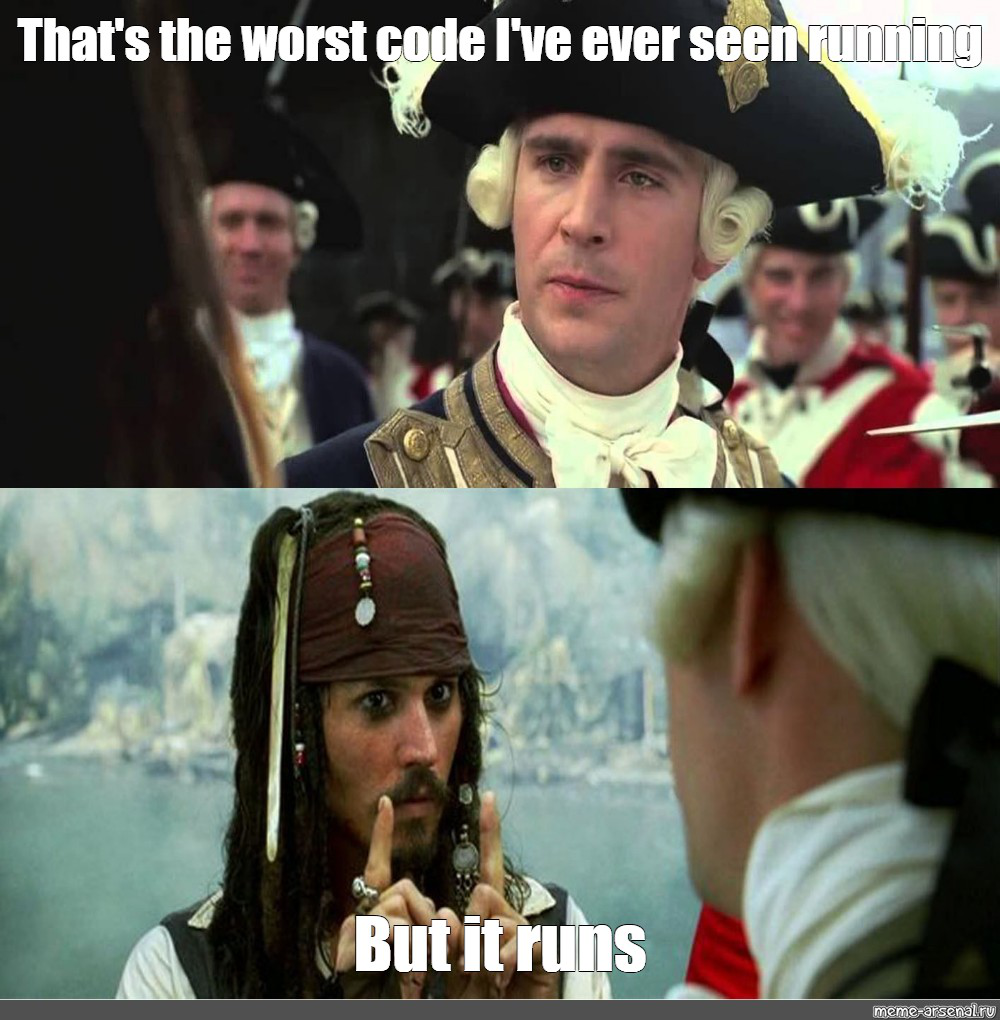

In [7]:
import requests
from IPython.display import display
from PIL import Image
display(Image.open(requests.get("https://www.meme-arsenal.com/memes/6817f9fcd8aced54b02d9903214e826e.jpg", stream = True).raw))

## 4. Juego

Bienvenido al juego
    Escriba su nombre de usuario
Manu
Tu usuario es Manu

    Elige una opción de juego
    1. Solitario
    2. En pareja
    3. Estadística
    4. Salir
Asegúrate de meter una opción correcta
1
Tu opción es la 1
Ahora elige un nivel de dificultad
            Fácil (20 intentos)
            Medio (12 intentos)
            Difícil (5 intentos)
Difícil
Tu nivel de dificultad es Difícil
Tu número de intentos es: 5
Bienvenido, una pena que no tengas amigos
Intenta adivinarlo, se trata de un número entero entre 1 y 100
50
Este es tu intento número 1
inténtalo otra vez, te has pasado mucho
25
Este es tu intento número 2
inténtalo otra vez, te has pasado mucho
12
Este es tu intento número 3
inténtalo otra vez, te has pasado mucho
1
Este es tu intento número 4
inténtalo otra vez, te has quedado muy corto
5
Este es tu intento número 5
¡Felicidades, acertaste!
Bienvenido al juego
    Escriba su nombre de usuario
Ana
Tu usuario es Ana

    Elige una opción de juego
    1. Soli

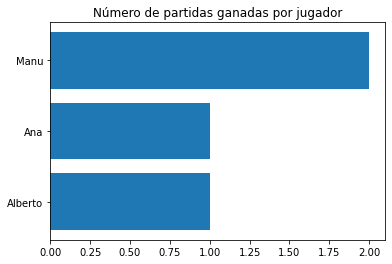

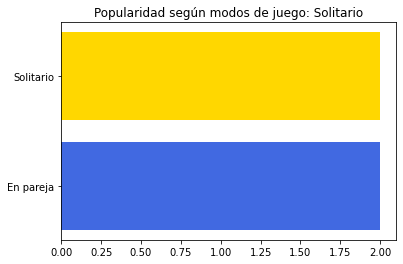

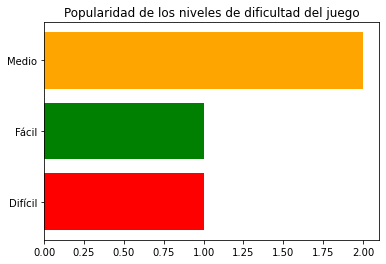

In [8]:
opción = 0
        
while opción !=4:    
    
    # menú (no hace falta definirlo como función)
    print("""Bienvenido al juego
    Escriba su nombre de usuario""")
    
    # Nos aseguramos que la primera letra del usuario esté siempre en mayúscula para evitar duplicidades
    usuario = str(input()).capitalize()
    print("Tu usuario es {}".format(usuario))
    print("""
    Elige una opción de juego
    1. Solitario
    2. En pareja
    3. Estadística
    4. Salir""")
                             

    # loop para meter una opción que corresponda a las mostradas en el menú (tampoco meter ni string ni float)
    while opción != 1 and opción != 2 and opción != 3 and opción !=4:
        print("Asegúrate de meter una opción correcta")
        while True:
            try:
                opción = int(input())
                break
            except ValueError:
                print("Asegúrate de meter una opción correcta")
                continue 
                
    # en caso de meter la opción correcta    
    else:
        print("Tu opción es la {}".format(opción))
        
        # menú para elegir nivel de dificultad si la opción no es estadísticas
        if (opción < 3):
            print("""Ahora elige un nivel de dificultad
            Fácil (20 intentos)
            Medio (12 intentos)
            Difícil (5 intentos)""")
            
            # loop para que se introduzca el nivel de dificultad adecuado
            nivel = str(input()).capitalize()
            while (nivel != "Fácil" and nivel != "Medio" and nivel != "Difícil"):
                print ("No te entiendo")
                nivel = str(input()).capitalize()
            else:
                print("Tu nivel de dificultad es {}".format(nivel))
            
            # Definición de máximo número de intentos según nivel de dificultad
            if nivel == "Fácil":
                max_attemps = 20
            elif nivel == "Medio":
                max_attemps = 12
            elif nivel == "Difícil":
                max_attemps = 5 
            print("Tu número de intentos es: {}".format(max_attemps))
        
        # si la opción es la primera
        if opción == 1:
            print("Bienvenido, una pena que no tengas amigos")
            
            # generar número aleatorio
            a = random.randint(0, 100)
            número = 0
            attemps = 0

            print("Intenta adivinarlo, se trata de un número entero entre 1 y 100")
            
            # loop para repetir la acción hasta que se acierte o se llegue al máximo de intentos
            while (número != a) and (attemps < max_attemps):
                
                # loop para asegurar que se meta un número correcto
                while True:
                    try:
                        número = int(input())
                        break
                    except ValueError:
                        print("Asegúrate de meter el número correctamente")
                        attemps += 1
                        print("Este es tu intento número {}".format(attemps))
                        continue
                        
                # Aumentar intentos        
                attemps += 1
                print("Este es tu intento número {}".format(attemps))  
                
                # Pistas para acertar
                if número < (0.8*float(a)):
                    print("inténtalo otra vez, te has quedado muy corto")
                elif número > (0.8*float(a)) and número < a:
                    print("Un poquito más")
                elif número > (1.2*float(a)):
                    print("inténtalo otra vez, te has pasado mucho")
                elif número < (1.2*float(a)) and número > a: 
                        print("Te pasaste por muy poco")
                if número < 1 or número > 100:
                        print("Ese número no está en el intervalo")
            
            # Si se acierta se añade la información a las listas, se crea un df con la nueva info y se hace concat con el excel
            # definimos opción = 0 para ir al primer while
            if número == a:
                print("¡Felicidades, acertaste!")
                usuarios.append(usuario)
                modos.append("Solitario")
                niveles.append(nivel)
                intentos.append(attemps)
                max_intentos.append(max_attemps)
                ganador.append("Sí")
                df = pd.DataFrame(list(zip(usuarios, modos, niveles, intentos, max_intentos, ganador)), 
                                      columns = ["usuarios", "modos", "niveles", "intentos", "max_intentos", "ganador"])
                frames = [f_df, df]
                result = pd.concat(frames)
                result.to_excel(r"juego.xlsx", index=False)
                
                # reproducimos video
                video = pafy.new(url_win)
                best = video.getbest()
                media = vlc.MediaPlayer(best.url)
                media.play()
                
                opción = 0
            
            # Ídem
            if attemps == max_attemps and número != a: 
                print("""Lo siento, has llegado al máximo número de intentos
                    
                    """)
                usuarios.append(usuario)
                modos.append("Solitario")
                niveles.append(nivel)
                intentos.append(attemps)
                max_intentos.append(max_attemps)
                ganador.append("No")
                df = pd.DataFrame(list(zip(usuarios, modos, niveles, intentos, max_intentos, ganador)), 
                                      columns = ["usuarios", "modos", "niveles", "intentos", "max_intentos", "ganador"])
                frames = [f_df, df]
                result = pd.concat(frames)
                result.to_excel(r"juego.xlsx", index=False)
                
                video = pafy.new(url_lose)
                best = video.getbest()
                media = vlc.MediaPlayer(best.url)
                media.play()
                
                opción = 0
        
        # Opción número 2, en pareja
        elif opción == 2:
            print("¡Bienvenidos!")
            print("Hola jugador, por favor introduzca el número a adivinar")
            b = 0
            número = 0
            attemps = 0
            
            # loop para meter el número correcto, ni string ni float. También asegurar que no se vea con getpass
            while b < 1 or b > 100:
                print("Asegúrate de meter el número correctamente")
                while True:
                    try:
                        b = int(getpass())
                        break
                    except ValueError:
                        print("Asegúrate de meter el número correctamente")
                        continue 
            else:
                print("Intenta adivinarlo, se trata de un número entero entre 1 y 100")
                while (número != b) and (attemps < max_attemps):
                    while True:
                        try:
                            número = int(input())
                            break
                        except ValueError:
                            print("Asegúrate de meter el número correctamente")
                            attemps += 1
                            print("Este es tu intento número {}".format(attemps))
                            continue
                            
                    attemps += 1
                    print("Este es tu intento número {}".format(attemps))
                    
                    
                    if número < (0.8*float(b)):
                        print("inténtalo otra vez, te has quedado muy corto")
                    elif número > (0.8*float(b)) and número < b:
                        print("Un poquito más")
                    elif número > (1.2*float(b)):
                        print("inténtalo otra vez, te has pasado mucho")
                    elif número < (1.2*float(b)) and número > b: 
                            print("Te pasaste por muy poco")
                    if número < 1 or número > 100:
                            print("Ese número no está en el intervalo")
                
                if número == b:
                    print("""¡Felicidades, acertaste!
                    
                    """)
                    usuarios.append(usuario)
                    modos.append("En pareja")
                    niveles.append(nivel)
                    intentos.append(attemps)
                    max_intentos.append(max_attemps)
                    ganador.append("Sí")
                    df = pd.DataFrame(list(zip(usuarios, modos, niveles, intentos, max_intentos, ganador)), 
                                      columns = ["usuarios", "modos", "niveles", "intentos", "max_intentos", "ganador"])
                    frames = [f_df, df]
                    result = pd.concat(frames)
                    result.to_excel(r"juego.xlsx", index=False)
                    
                    video = pafy.new(url_win)
                    best = video.getbest()
                    media = vlc.MediaPlayer(best.url)
                    media.play()
                    opción = 0
                    
                if attemps == max_attemps and número != b: 
                    print("""Lo siento, has llegado al máximo número de intentos
                    
                    """)
                    usuarios.append(usuario)
                    modos.append("En pareja")
                    niveles.append(nivel)
                    intentos.append(attemps)
                    max_intentos.append(max_attemps)
                    ganador.append("No")
                    df = pd.DataFrame(list(zip(usuarios, modos, niveles, intentos, max_intentos, ganador)), 
                                      columns = ["usuarios", "modos", "niveles", "intentos", "max_intentos", "ganador"])
                    frames = [f_df, df]
                    result = pd.concat(frames)
                    result.to_excel(r"juego.xlsx", index=False)
                    
                    video = pafy.new(url_lose)
                    best = video.getbest()
                    media = vlc.MediaPlayer(best.url)
                    media.play()
                
                    opción = 0
                    
                
        elif opción == 3:
            print("Bienvenido, aquí se muestran las estadísticas del juego")
            
            ## si se elige estadísticas, se carga el fichero f_df
            f_df = pd.read_excel(r'juego.xlsx')
            
            # número de partidas ganadas por jugador
            a = (f_df['ganador'] == 'Sí').groupby(f_df['usuarios']).count()
            a = pd.DataFrame(a).reset_index()
            plt.figure()
            plt.title("Número de partidas ganadas por jugador")
            plt.barh(a["usuarios"], a["ganador"])
   
            ## popularidad modos de juego
            a = (f_df["usuarios"]).groupby(f_df['modos']).count()
            a = pd.DataFrame(a).reset_index()
            a["modos"] = a["modos"].astype(str)
            colors = {"Solitario":"gold", "En pareja":"royalblue"}
            plt.figure()
            plt.title("Popularidad según modos de juego: Solitario")
            plt.barh(a["modos"], a["usuarios"], color=a["modos"].map(colors))
            
            ## popularidad niveles de dificultad
            a = (f_df["usuarios"]).groupby(f_df['niveles']).count()
            a = pd.DataFrame(a).reset_index()
            colors = {"Fácil":"green", "Medio":"orange", "Difícil":"red"}
            plt.figure()
            plt.title("Popularidad de los niveles de dificultad del juego")
            plt.barh(a["niveles"], a["usuarios"], color=a["niveles"].map(colors))          
            break
            
else:
    print("Hasta pronto")